## <div style="direction:ltr;text-align:left;">In this repo we will review all of thing that i learned about Opencv :D.</div>
<div> We will go from simple concepts to complex concepts and cover every thing that I know.</div>
<div>I hope that this repo can help you learn something new about Opencv.</div> 

In [2]:
#import modules
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

## <div style="direction:ltr;text-align:left;">We will start with a simple lesson reading images and showing them.</div>

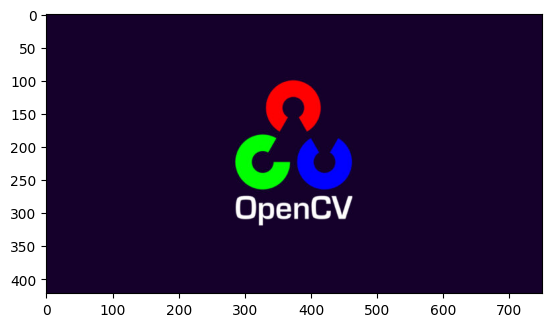

In [5]:
# All of pictures that you will need is in the 'Pictures' file.
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
"""
When we read images using opencv their color channels are 'B-G-R' 
but matplotlib can show images correctly when their color channels are 'R-G-B'.
"""
plt.imshow(img)

## <div style="direction:ltr;text-align:left;">Cropping pictures and figure in matplotlib</div>

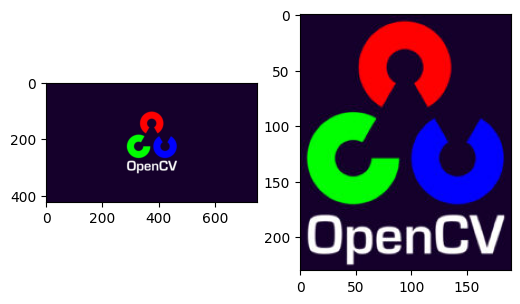

In [40]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
#We can use pixels for croppting every part that we want.
cropped_img = img[95:325,280:470]
#You can use 'figure' to create set of images to show and set the size of the set using 'figsize' parameter.
#figsize = [Width,Height]
plt.figure(figsize=[6,10])
#Use 'subplot' to set the position of image.
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)

plt.imshow(cropped_img)

## <div style="direction:ltr;text-align:left;">Color channels</div>

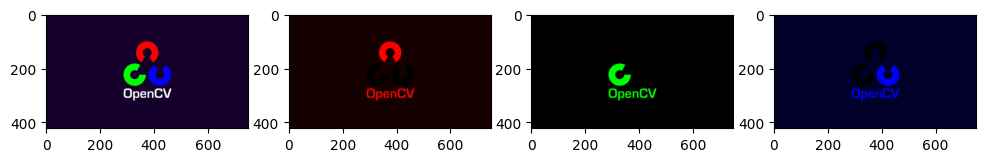

In [15]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
#First get all of color channels for your image using split.
R_channel,G_channel,B_channel = cv.split(img)
#Create a matrix with zero values like one of your color channels.
black_channel = np.zeros_like(R_channel)
#Create a new image and pass the color channel that you want to show.
Red_image = cv.merge([R_channel,black_channel,black_channel])
Green_image = cv.merge([black_channel,G_channel,black_channel])
blue_image = cv.merge([black_channel,black_channel,B_channel])
#After that show the images.
plt.figure(figsize=[12,15])
plt.subplot(141)
plt.imshow(img)
plt.subplot(142)
plt.imshow(Red_image)
plt.subplot(143)
plt.imshow(Green_image)
plt.subplot(144)
plt.imshow(blue_image)



## <div style="direction:ltr;text-align:left;">Gray images</div>

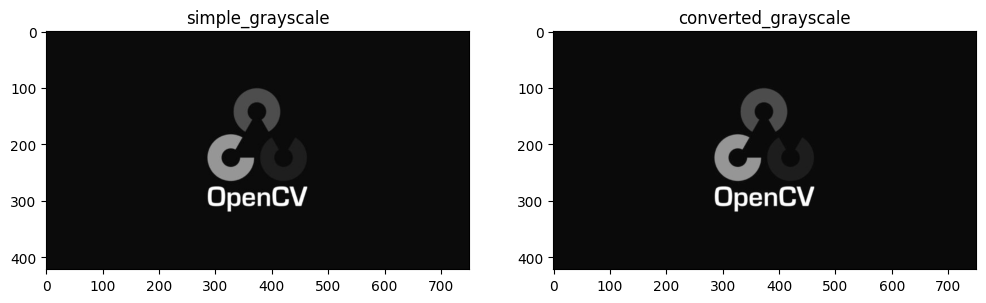

In [28]:
#We can pass 0 for flags to make our image a grayscale image
simple_grayscale = cv.imread("Pictures/opencv.jpg",0)
converted_grayscale = cv.imread("Pictures/opencv.jpg")
#Or we can convert it to grayscale image.
converted_grayscale = cv.cvtColor(converted_grayscale,cv.COLOR_BGR2GRAY)
#You have to pass 'gray' for 'cmap' in 'imshow' to show grayscale images in matplotlib.
plt.figure(figsize=[12,15])
plt.subplot(121)
#Put title for your image with 'title'.
plt.title("simple_grayscale")
plt.imshow(simple_grayscale,cmap="gray")
plt.subplot(122)
plt.title("converted_grayscale")
plt.imshow(converted_grayscale,cmap="gray")


## <div style="direction:ltr;text-align:left;">Transparent image</div>

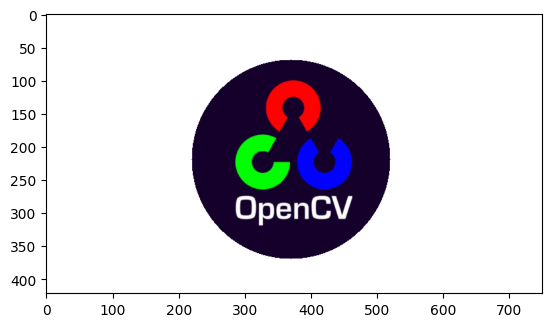

In [15]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#Get hight and width for your image.
hight,width = img.shape[0:2]
#Create a 4 channel iamge.
transparent_img = np.zeros((hight,width,4),np.uint8)
#Set channels 0 to 2 equal to your image.
transparent_img[...,0:3] = img
#Create a mask.
mask = np.zeros((hight,width),np.uint8)
#Set part of image that you want to be shown.
cv.circle(mask, (370, 220),150, (255,255,255), -1)
#Set channel 3 equal to your mask.
transparent_img[...,3] = mask
plt.imshow(transparent_img)


## <div style="direction:ltr;text-align:left;">Water mark</div>

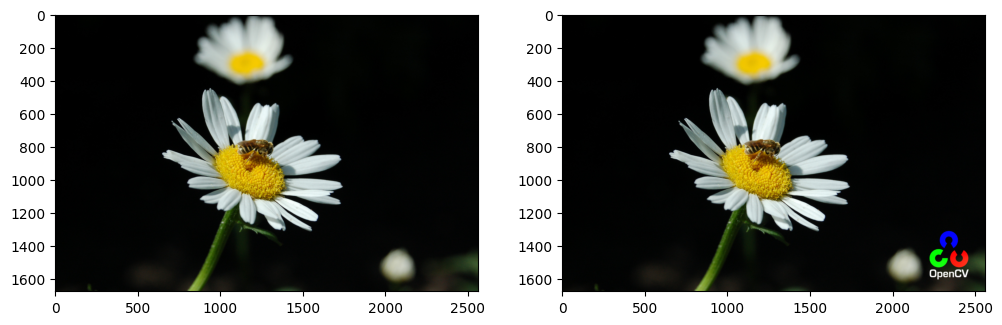

In [23]:
img = cv.imread("Pictures/bee-on-daisy.jpg")
logo = cv.imread("Pictures/black_cv.png")#This method for water marking mustly works when the logo backgroud is balck. 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#Get hight and width of logo.
hight, width = logo.shape[0:2]
#Create a black image with size of original.
black_image = np.zeros_like(img,np.uint8)
#Set the place that you want to put your logo.
black_image[1300:hight+1300,2200:width+ 2200] = logo
#Add orginal image to black image.
black_image = cv.add(black_image,img)
plt.figure(figsize=[12,15])
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(black_image)
  

## <div style="direction:ltr;text-align:left;">Look Up Table (lut)</div>

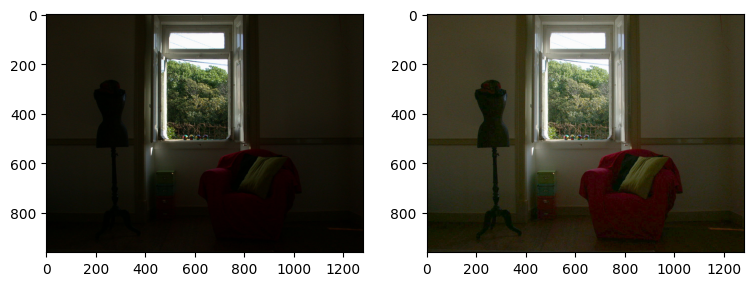

In [53]:
img = cv.imread("Pictures/dark_image.jpg")
#Set amount of brigtness that you want.
gama = 0.6
#Create a  matrix that all of values are in range of (1,256) .
look_up_table = np.empty((1,256), np.uint8)
#Do all of this stuf to Increase image brightness.
for i in range(256):
    look_up_table[0,i] = ((i/255) ** gama) * 255
#Apply look_up_table to your image.
final_img = cv.LUT(img,look_up_table)
final_img = cv.cvtColor(final_img,cv.COLOR_BGR2RGB)
plt.figure(figsize=[9,12])
plt.subplot(121)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(final_img)

## <div style="direction:ltr;text-align:left;">Video</div>

In [ ]:
video_cap = cv.VideoCapture("Videos/race_car.mp4")
while True :
    frame, ret = video_cap.read()
    if video_cap.isOpened() == False :
        break
    #I cant show you the output but you can see it yourself.
    cv.imshow("frame",frame)
    if cv.waitKey(1) == 27 :
        break

## <div style="direction:ltr;text-align:left;">save video</div>

In [18]:

 
cap = cv.VideoCapture("Videos/race_car.mp4")

# Get video height and width
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)

# we are using x264 codec for mp4
fourcc = cv.VideoWriter_fourcc(*'X264')
writer = cv.VideoWriter('Videos/OUTPUT.mp4', fourcc=fourcc,
                     fps=20, frameSize=(int(width), int(height)))

while True:
    ret, frame = cap.read()
    if not ret: 
        break # break if cannot receive frame
    # convert to grayscale
    writer.write(frame) # write frame    
    if cv.waitKey(1) & 0xFF == ord('q'): # on press of q break
        break
        
# release and destroy windows
writer.release()
cap.release()
cv.destroyAllWindows()

## <div style="direction:ltr;text-align:left;">Thersh Hold/Adaptive thersh hold</div>

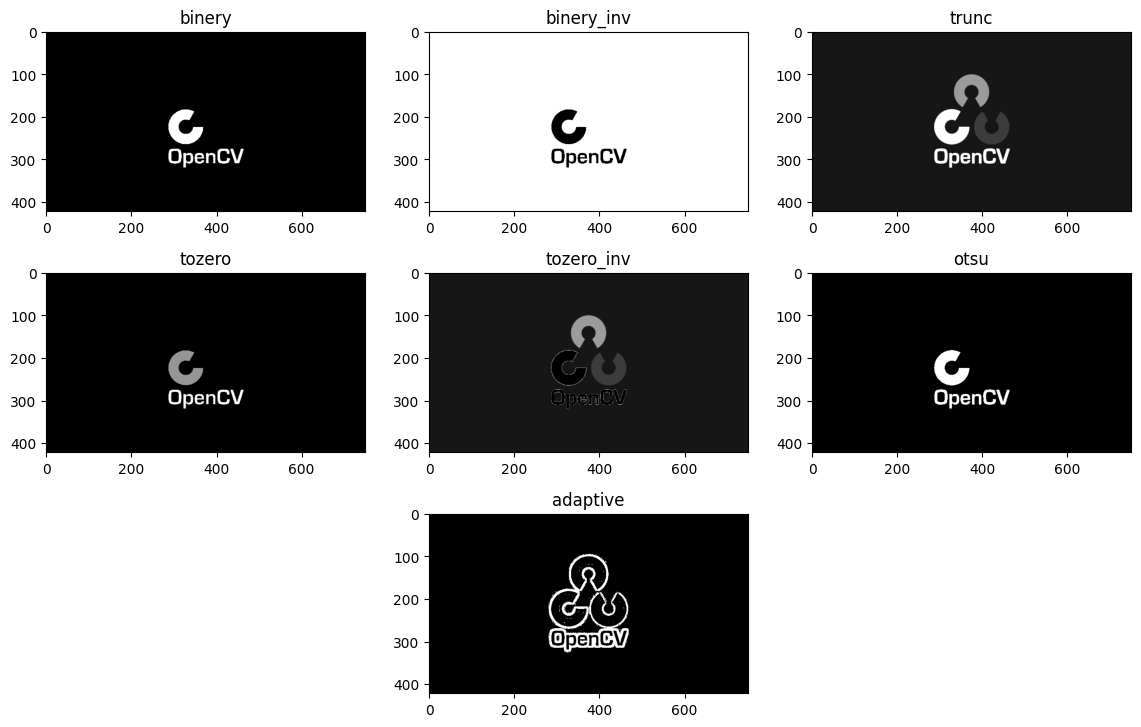

In [75]:
img = cv.imread("Pictures/opencv.jpg",0)
#First we get a grayscale image and we set the thershhold
ret,thersh_hold_binery = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thersh_hold_binery_inv = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thersh_hold_trunc = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thersh_hold_tozero = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thersh_hold_tozero_inv = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
#This method can get best threshold it can be useful.
ret,thersh_hold_otsu = cv.threshold(img,127,255,cv.THRESH_OTSU)
#This method find best threshold for each part of image.
adaptive_thershhold = cv.adaptiveThreshold(img,275,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,2)
plt.figure(figsize=[14,12])
plt.subplot(431)
plt.title("binery")
plt.imshow(thersh_hold_binery,cmap="gray")
plt.subplot(432)
plt.title("binery_inv")
plt.imshow(thersh_hold_binery_inv,cmap="gray")
plt.subplot(433)
plt.title("trunc")
plt.imshow(thersh_hold_trunc,cmap="gray")
plt.subplot(434)
plt.title("tozero")
plt.imshow(thersh_hold_tozero,cmap="gray")
plt.subplot(435)
plt.title("tozero_inv")
plt.imshow(thersh_hold_tozero_inv,cmap="gray")
plt.subplot(436)
plt.title("otsu")
plt.imshow(thersh_hold_otsu,cmap="gray")
plt.subplot(438)
plt.title("adaptive")
plt.imshow(adaptive_thershhold,cmap="gray")



 ## <div style="direction:ltr;text-align:left;">Morphology</div>

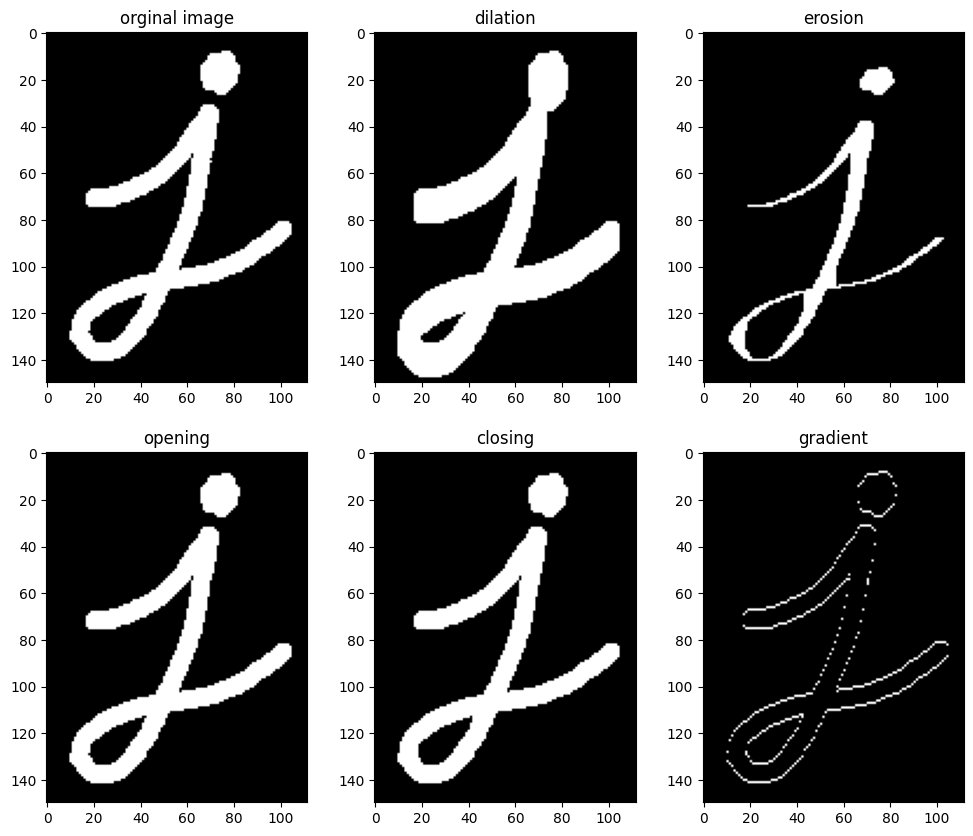

In [78]:
img = cv.imread("Pictures/Morphology.png",0)
#FIrst we get a binery thersh hold out of image.
ret,thersh_hold_binery = cv.threshold(img,127,255,cv.THRESH_BINARY)
#Create all kind of morphologys
dilation = cv.morphologyEx(img,cv.MORPH_DILATE,(5,5),iterations=7)    
erosion = cv.morphologyEx(img,cv.MORPH_ERODE,(5,5),iterations=7)  
#This methods does not need any iterations because it's just affect image just one time.
opening = cv.morphologyEx(img,cv.MORPH_OPEN,(5,5))   
closing = cv.morphologyEx(img,cv.MORPH_CLOSE,(5,5)) 
#This method is useful for determining the outline of obejcts in image.
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, (5,5))
plt.figure(figsize=[12,10])
plt.subplot(231)
plt.title("orginal image")
plt.imshow(img,cmap="gray")
plt.subplot(232)
plt.title("dilation")
plt.imshow(dilation,cmap="gray")
plt.subplot(233)
plt.title("erosion")
plt.imshow(erosion,cmap="gray")
plt.subplot(234)
plt.title("opening")
plt.imshow(opening,cmap="gray")
plt.subplot(235)
plt.title("closing")
plt.imshow(closing,cmap="gray")
plt.subplot(236)
plt.title("gradient")
plt.imshow(gradient,cmap="gray")

## <div style="direction:ltr;text-align:left;">Connected componets</div>

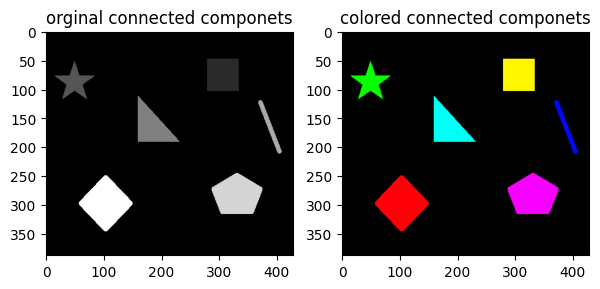

In [7]:
img = cv.imread("Pictures/shapes.png",0)
#First we create a thersh hold.
ret,img = cv.threshold(img,127,255,cv.THRESH_BINARY)
#We create two connected Components there are same but we use it in different way.
#'number_of_labels' is telling us how much labels do we have.
#'label' is our image that method is applied to it.
number_of_labels,orginal_labes = cv.connectedComponents(img)
number_of_labels,colored_labes = cv.connectedComponents(img)
# Map component labels to hue val, 0-179 is the hue range in OpenCV.
label_hue = np.uint8(179*colored_labes/np.max(colored_labes))
blank = np.ones_like(img) * 255
labeled_img = cv.merge([label_hue, blank, blank])

#Converting hsv to RGB
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2RGB)

#Set background label to black.
labeled_img[label_hue==0] = 0
plt.figure(figsize=[7,12])
plt.subplot(121)
plt.title("original connected componets")
plt.imshow(orginal_labes,cmap="gray")
plt.subplot(122)
plt.title("colored connected componets")
plt.imshow(labeled_img)


## <div style="direction:ltr;text-align:left;">Contur</div>

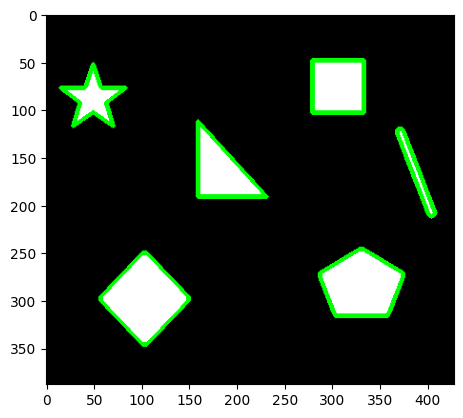

In [8]:
img = cv.imread("Pictures/shapes.png",0)
#For finding contour we first have to make threshold of our image.
ret,thersh = cv.threshold(img,127,255,cv.THRESH_BINARY)
#With this method we create contours.
#'contours' is variable that we use to draw contours.
contours, hierarchy =  cv.findContours(thersh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#We draw contours using this method.
cv.drawContours(img,contours,-1,(0,255,0),3)
plt.imshow(img)

## <div style="direction:ltr;text-align:left;">Approx poly</div>

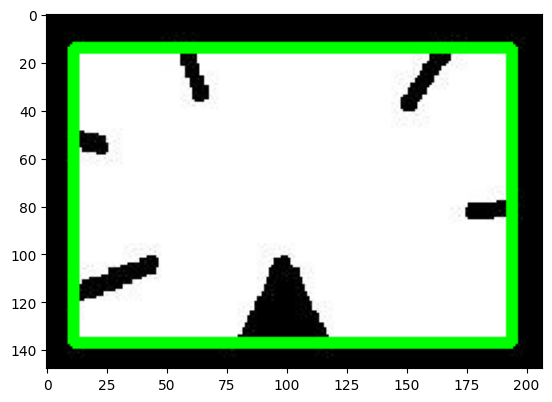

In [12]:
img = cv.imread("Pictures/approx.jpg",0)
ret,thersh = cv.threshold(img,127,255,cv.THRESH_BINARY)
#First we find find contours.
conturs,_ = cv.findContours(thersh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
#beacuz we only have one object we use 'contours[0]' if we had more than one objects we could use for loop.
#With this method we find area of our object and that number is amount of accuracy , and we pass True for closed parameter.
eplison = 0.1 * cv.arcLength(conturs[0],True)
# With this method we can find points to draw the approxPoly.
approx = cv.approxPolyDP(conturs[0],eplison,True)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.drawContours(img,[approx],0,(0,255,0),3)
plt.imshow(img,cmap="gray")


## <div style="direction:ltr;text-align:left;">Color detection</div>

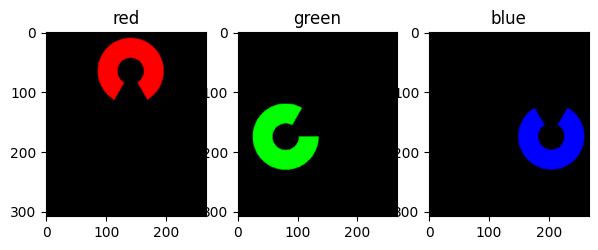

In [41]:
img = cv.imread("Pictures/black_cv.png")
#First we create a hsv image
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#We set the range of colors that we want to be detected.
#Blue range.
lowerb_blue = np.array([90,50,50])
upperb_blue = np.array([170,255,255])
#We create a mask from detected colors.
blue_mask = cv.inRange(hsv,lowerb_blue,upperb_blue)
#We can use bitwise and make a image that only shows areas that mask is white.
blue_image = cv.bitwise_and(img,img,mask=blue_mask)
#Green range.
lowerb_green = np.array([25, 52, 72], np.uint8) 
upperb_green  = np.array([102, 255, 255], np.uint8) 
green_mask = cv.inRange(hsv, lowerb_green, upperb_green) 
green_image = cv.bitwise_and(img,img,mask=green_mask)
#Red range.
lowerb_red = np.array([0,50,50])
upperb_red = np.array([5,255,255])
red_mask = cv.inRange(hsv, lowerb_red, upperb_red) 
red_image = cv.bitwise_and(img,img,mask=red_mask)

plt.figure(figsize=[7,12])
plt.subplot(131)
plt.title("red")
plt.imshow(red_image)
plt.subplot(132)
plt.title("green")
plt.imshow(green_image)
plt.subplot(133)
plt.title("blue")
plt.imshow(blue_image)



## <div style="direction:ltr;text-align:left;">Pop Effect</div>

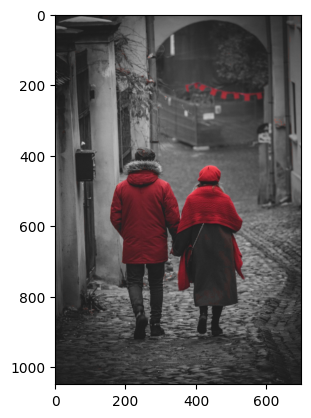

In [17]:
img = cv.imread("Pictures/PopEffects.jpeg")
#Create hsv image for color detection and gray image for background. 
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#In hsv color channels there are to kind of red color one of them is in range of 0 to 5 and another one is 160 to 179.
#We use this and combine this two red color to detect all red color that are in image.
lowerb_red = np.array([0,50,50])
upperb_red = np.array([5,255,255])
red_mask = cv.inRange(hsv, lowerb_red, upperb_red) 

second_lowerb_red = np.array([160,50,50])
second_upperb_red = np.array([179,255,255])
second_red_mask = cv.inRange(hsv, second_lowerb_red, second_upperb_red) 

final_mask = red_mask + second_red_mask
#We create our background mask.
back_ground_mask = cv.bitwise_not(final_mask)

red_image = cv.bitwise_and(img,img,mask=final_mask)
#We create our gray background image.
back_ground_image = cv.bitwise_and(gray,gray,mask = back_ground_mask)
#Because all of gray images have only one channel we will times it by three so our gray image will have three channels.
back_ground_image = cv.merge([back_ground_image]*3)
#We combine all of images and we will have our final image.
final_image = cv.add(red_image,back_ground_image)
final_image = cv.cvtColor(final_image,cv.COLOR_BGR2RGB)
plt.imshow(final_image)



## <div style="direction:ltr;text-align:left;">Clahe</div>

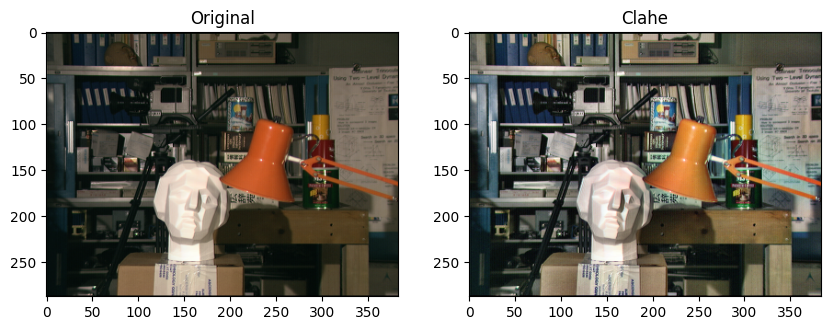

In [12]:
img = cv.imread("Pictures/statue.png")
#First we get all of channels for our image.
channels = cv.split(img)
#We create a clahe object.
clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
#We will use 'apply' method on channels and put them in this list.
clahe_channels = []
for channel in channels :
    clahe_channels.append(clahe.apply(channel))
#We merge channels and get the final image.
final_image = cv.merge(clahe_channels)
final_image = cv.cvtColor(final_image,cv.COLOR_BGR2RGB)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.figure(figsize=[10,11])
plt.subplot(121)
plt.title("Original")
plt.imshow(img)
plt.subplot(122)
plt.title("Clahe")
plt.imshow(final_image)


## <div style="direction:ltr;text-align:left;">Denoising</div>

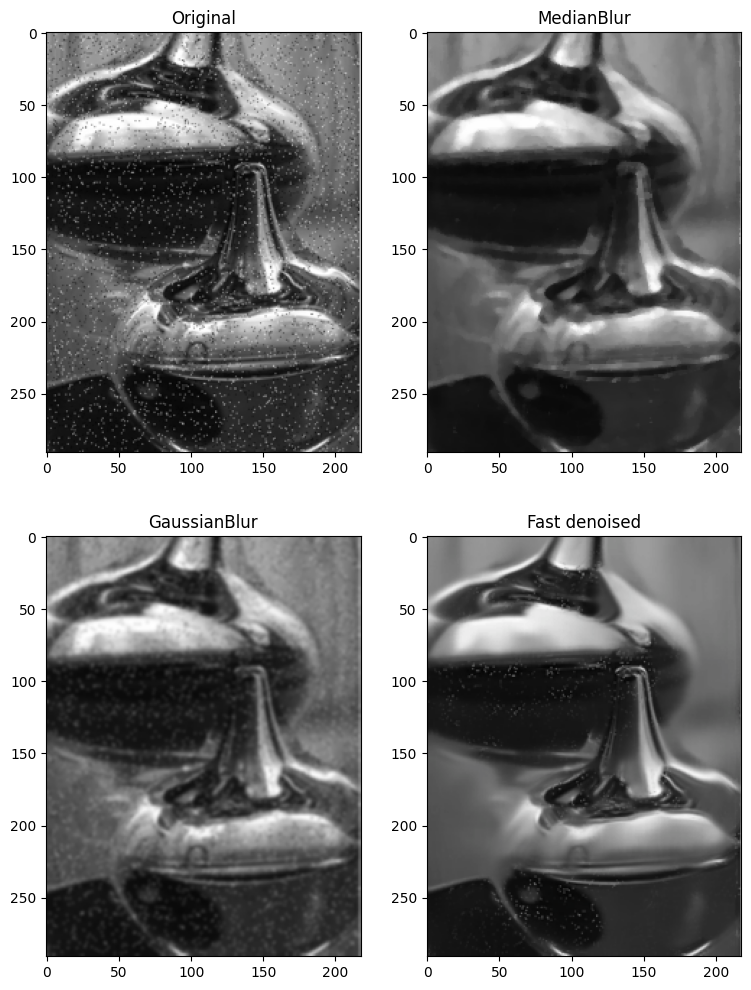

In [46]:
img = cv.imread("Pictures/Salt_Pepper_Noise.png")
#This to remove noise by smoothing and blurring images.
medianBlur_denoised_image = cv.medianBlur(img,5)
GaussianBlur_denoised_image = cv.GaussianBlur(img,(5,5),0)
#And this one specifically removes noise.
fast_denoised_image = cv.fastNlMeansDenoisingColored(img,None,16,16,8,19)
plt.figure(figsize=[9,12])
plt.subplot(221)
plt.title("Original")
plt.imshow(img)
plt.subplot(222)
plt.title("MedianBlur")
plt.imshow(medianBlur_denoised_image)
plt.subplot(223)
plt.title("GaussianBlur")
plt.imshow(GaussianBlur_denoised_image)
plt.subplot(224)
plt.title("Fast denoised")
plt.imshow(fast_denoised_image)